<a href="https://colab.research.google.com/github/eugeniaaaaaaaaaaaa/linear_regression/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_DA%26ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кейс «Анализ факторов, влияющих на употребление табака в США»
**Аннотация.** Курение, несмотря на все существующие предупреждения о его вредности, продолжает оставаться одной из самых распространенных вредных привычек среди населения США. Каждый год тысячи людей умирают от заболеваний, связанных с курением. Изучение причин курения и поиски эффективных способов борьбы с этой привычкой являются важными задачами в области общественного здравоохранения. Программы по борьбе с курением, включающие информационные кампании, консультации и другие меры, могут помочь людям бросить курить и избежать многих заболеваний, связанных с курением. Поэтому изучение данных об употреблении табака и поиск способов борьбы с курением являются важными шагами на пути к более здоровому обществу.

**Цель:** проанализировать данные по употреблению табака в США. Выявить основные факторы, влияющие на уровень употребления табака и предложить прогноз (построить регрессионную модель) по уровню употреблению табака в США в зависимости от выявленных факторов.

**Техническое задание:** требуется проанализировать данные по употреблению табака в США и зависимости количества людей, курящих ежедневно, от таких факторов как год, штат, процент бросивших курить, процент никогда не курящих и процент людей, иногда употребляющих табак, а также дать прогноз по употреблению табака в США. Построить качественную модель и объяснить ее выбор. По построенной модели дать интерпретацию (какие факторы влияют на вероятность курения или бросания курения и определить наиболее важные факторы, которые можно использовать для разработки эффективных программ по борьбе с курением) и дать прогноз по будущим тенденциям и изменениям употребления табака в США. Пояснить полученные результаты.


В датасете есть полные данные (16 - c 1995 по 2010) по 50 штатам, District of Columbia - 15 (с 1996), Puerto Rico - 15(с 1996), Hawaii - 15(без 2004), Utah - 14(с 1997), Virgin Islands - 10 (с 2001), Guam - 7 (с 2001 кроме 2004). Пуэрто-Рико,  Виргинские Острова, Гуам - островные территории.

Еще есть общие полные данные - Nationwide (States, DC, and Territories) и Nationwide (States and DC)

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
def chaddock(_corrcoef):
  _corr = abs(_corrcoef)
  _vals = ((0.1, 'отсутствует'), (0.3, 'слабая'), (0.5, 'умеренная'),
           (0.7, 'заметная'), (0.9, 'высокая'), (1, 'очень высокая'))
  _ans = 'коэффициент корреляции вычислен неверно'
  for _v in _vals:
    if _corr <= _v[0]:
      _ans = _v[1]
      break
  return _ans

def r2_adj(X, y, y_count):
  n = len(y)  # объем выборки, на которой строили модель
  k = len(X) + 1  # количество параметров модели
  return 1 - (1 - metrics.r2_score(y, y_count)) * (n - 1) / (n - k)

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/eugeniaaaaaaaaaaaa/linear_regression/refs/heads/main/Smoking.csv', sep=';')
df = df.drop('index', axis=1)

df.columns = ['year', 'state', 'everyday', 'sometimes', 'former', 'never']
smokers_data = ['everyday', 'sometimes', 'former', 'never']
names = {
    'year': 'Год',
    'state': 'Название штата',
    'everyday': 'Курящие каждый день',
    'sometimes': 'Курящие иногда',
    'former': 'Бросившие курить',
    'never': 'Никогда не курившие'
}

print(f'Количество пропусков в данных:\n{df.isna().sum()}')

df[smokers_data] = df[smokers_data].applymap(lambda v: float(v[:-1]) / 100)
df_common = df[df.state == 'Nationwide (States, DC, and Territories)']
df_no_ter =  df[df.state =='Nationwide (States and DC)']
df = df[~((df.state == 'Nationwide (States, DC, and Territories)') | (df.state =='Nationwide (States and DC)'))]#.sort_values(by=['Year'], ascending=True)

print('''
Пропусков в строках данных нет, однако в датасете отсутствуют следующие данные:
- District of Columbia (1995)
- Puerto Rico (1995)
- Hawaii (2004)
- Utah (1995-1996)
- Virgin Islands (1995-2000)
- Guam (1995-2000, 2004)
''')

print(f'''
Проверка корректности данных - суммируем доли опрошенных
Основной датасет: {df[smokers_data].sum(axis=1).mean():.3f}
Nationwide (States, DC, and Territories): {df_common[smokers_data].sum(axis=1).mean():.3f}
Nationwide (States and DC): {df_no_ter[smokers_data].sum(axis=1).mean():.3f}
0.7% вероятно потеряны из-за округления ''')

Количество пропусков в данных:
year         0
state        0
everyday     0
sometimes    0
former       0
never        0
dtype: int64

Пропусков в строках данных нет, однако в датасете отсутствуют следующие данные:
- District of Columbia (1995)
- Puerto Rico (1995)
- Hawaii (2004)
- Utah (1995-1996)
- Virgin Islands (1995-2000)
- Guam (1995-2000, 2004)


Проверка корректности данных - суммируем доли опрошенных
Основной датасет: 1.000
Nationwide (States, DC, and Territories): 0.993
Nationwide (States and DC): 0.993
0.7% вероятно потеряны из-за округления 


/tmp/ipython-input-41709562.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[smokers_data] = df[smokers_data].applymap(lambda v: float(v[:-1]) / 100)


In [10]:
# переменную State превратим в дамми-переменные
dummy = pd.get_dummies(
    df.state,
    drop_first=False
)
df = pd.concat([df, dummy], axis="columns")
df.sample(5, random_state=7)

,year,state,everyday,sometimes,former,never,Alabama,Alaska,Arizona,Arkansas,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
832,2002,Pennsylvania,0.195,0.051,0.257,0.497,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
786,2002,Texas,0.166,0.062,0.209,0.562,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
689,1996,Idaho,0.168,0.044,0.228,0.560,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,2008,Arizona,0.107,0.052,0.274,0.567,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
808,2004,Idaho,0.134,0.041,0.234,0.592,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
print('Среднее:')
print(df[smokers_data].mean())

print('\nМода:')
print(df[smokers_data].mode())

print('\nМедиана:')
print(df[smokers_data].median())

print('\nСтандартное отклонение:')
print(df[smokers_data].std())


print('\nКвантили:')
print(pd.concat([df[smokers_data].quantile(q=0.25), df[smokers_data].quantile(q=0.5), df[smokers_data].quantile(q=0.75)], axis=1, keys=['Q1', 'Q2', 'Q3']))

Среднее:
everyday     0.165588
sometimes    0.048411
former       0.243108
never        0.542905
dtype: float64

Мода:
   everyday  sometimes  former  never
0     0.165      0.051   0.247  0.516
1     0.170        NaN     NaN  0.519
2     0.197        NaN     NaN    NaN

Медиана:
everyday     0.166
sometimes    0.049
former       0.245
never        0.535
dtype: float64

Стандартное отклонение:
everyday     0.040308
sometimes    0.011708
former       0.035652
never        0.056970
dtype: float64

Квантили:
              Q1     Q2     Q3
everyday   0.139  0.166  0.192
sometimes  0.042  0.049  0.056
former     0.229  0.245  0.262
never      0.509  0.535  0.563


In [12]:
df[smokers_data].describe()[1:]

,everyday,sometimes,former,never
mean,0.165588,0.048411,0.243108,0.542905
std,0.040308,0.011708,0.035652,0.056970
min,0.036000,0.013000,0.099000,0.395000
25%,0.139000,0.042000,0.229000,0.509000
50%,0.166000,0.049000,0.245000,0.535000
75%,0.192000,0.056000,0.262000,0.563000
max,0.291000,0.085000,0.334000,0.837000


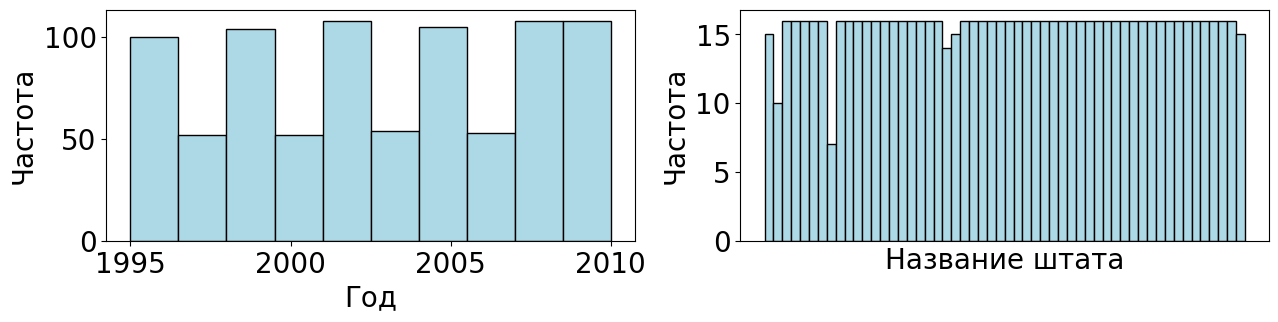

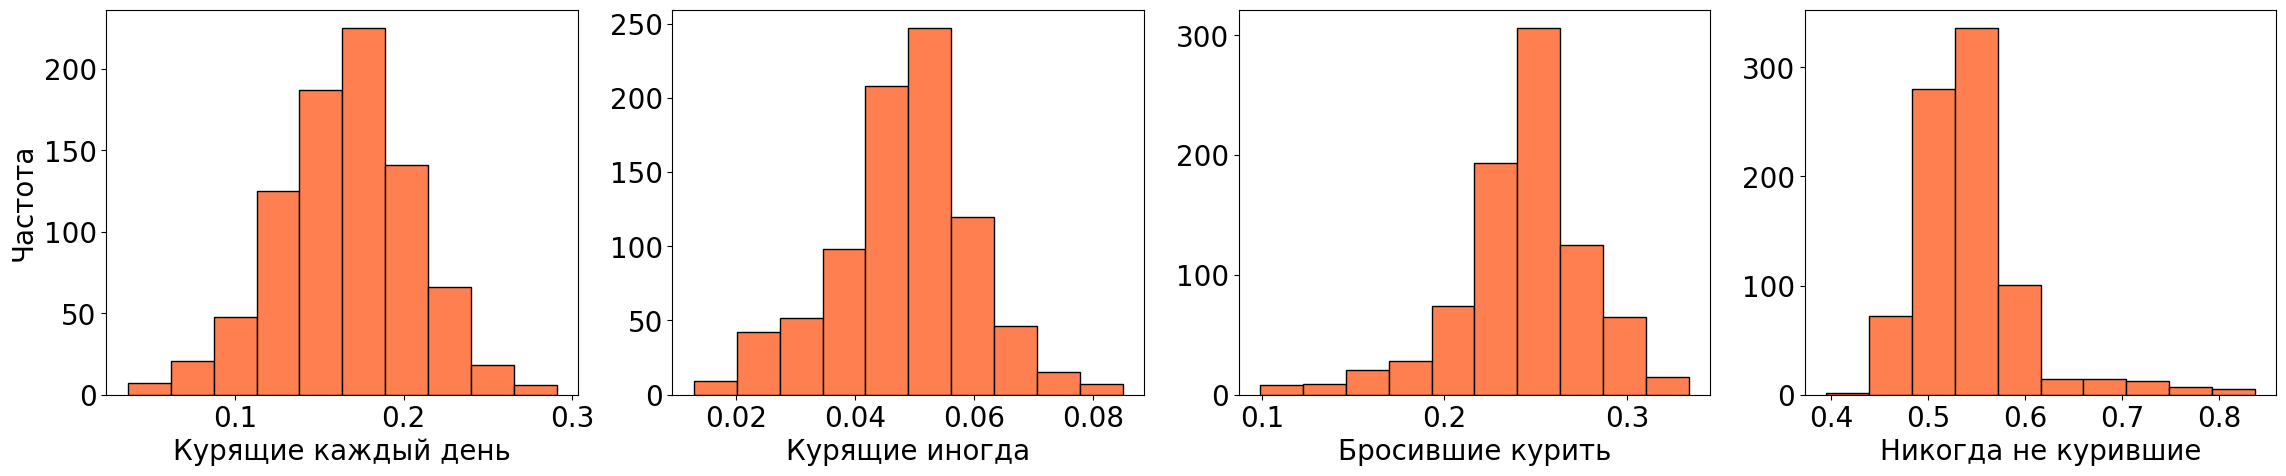

In [13]:
# проверка на нормальность
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.hist(df.year, bins=10, color="lightblue", linewidth=1, edgecolor="black")
plt.xlabel(names["year"] )
plt.ylabel("Частота")

plt.subplot(1, 2, 2)
plt.hist(df.state, bins=len(df.state.unique()), color="lightblue", linewidth=1, edgecolor="black", label='enabled')
plt.xlabel(names["state"])
plt.ylabel("Частота")
plt.xticks([])

plt.show()


plt.figure(figsize=(28, 5))

plt.subplot(1, 4, 1)
plt.hist(df[smokers_data[0]], bins=10, color="coral", linewidth=1, edgecolor="black")
plt.xlabel(names[smokers_data[0]])
plt.ylabel("Частота")
for i in range(1, 4):
  plt.subplot(1, 4, i + 1)
  plt.hist(df[smokers_data[i]], bins=10, color="coral", linewidth=1, edgecolor="black")
  plt.xlabel(names[smokers_data[i]])


In [14]:
alpha = 0.05
isnorm = lambda p_value: ('ненормально', 'нормально')[int(p_value >= alpha)]
print(f'''Проверим данные на нормальность с помощью критерия Жарка-Бера.
Уровень значимости α = 0.05\n''')
for col in smokers_data + ['year']:
  p_val = stats.jarque_bera(df[col])[1]
  print(f'{names[col]}:  p = {p_val:.3}, распределение {isnorm(p_val)}')

Проверим данные на нормальность с помощью критерия Жарка-Бера.
Уровень значимости α = 0.05

Курящие каждый день:  p = 0.136, распределение нормально
Курящие иногда:  p = 0.028, распределение ненормально
Бросившие курить:  p = 7.01e-45, распределение ненормально
Никогда не курившие:  p = 0.0, распределение ненормально
Год:  p = 9.15e-12, распределение ненормально


In [15]:
# проверим данные на упорядоченность
# используем критерий Вальда-Волфовитца
import statsmodels
print("p-значение:", statsmodels.sandbox.stats.runs.runstest_1samp(df.everyday)[1])
print("p-значение после перемешивания:", statsmodels.sandbox.stats.runs.runstest_1samp(df.sample(len(df), random_state=6786866).everyday)[1])
df = df.sample(len(df), random_state=6786866)

p-значение: 0.02819076259089825
p-значение после перемешивания: 0.8986503893607215


In [16]:
corr_matrix = df.corr(method="spearman", numeric_only=True)

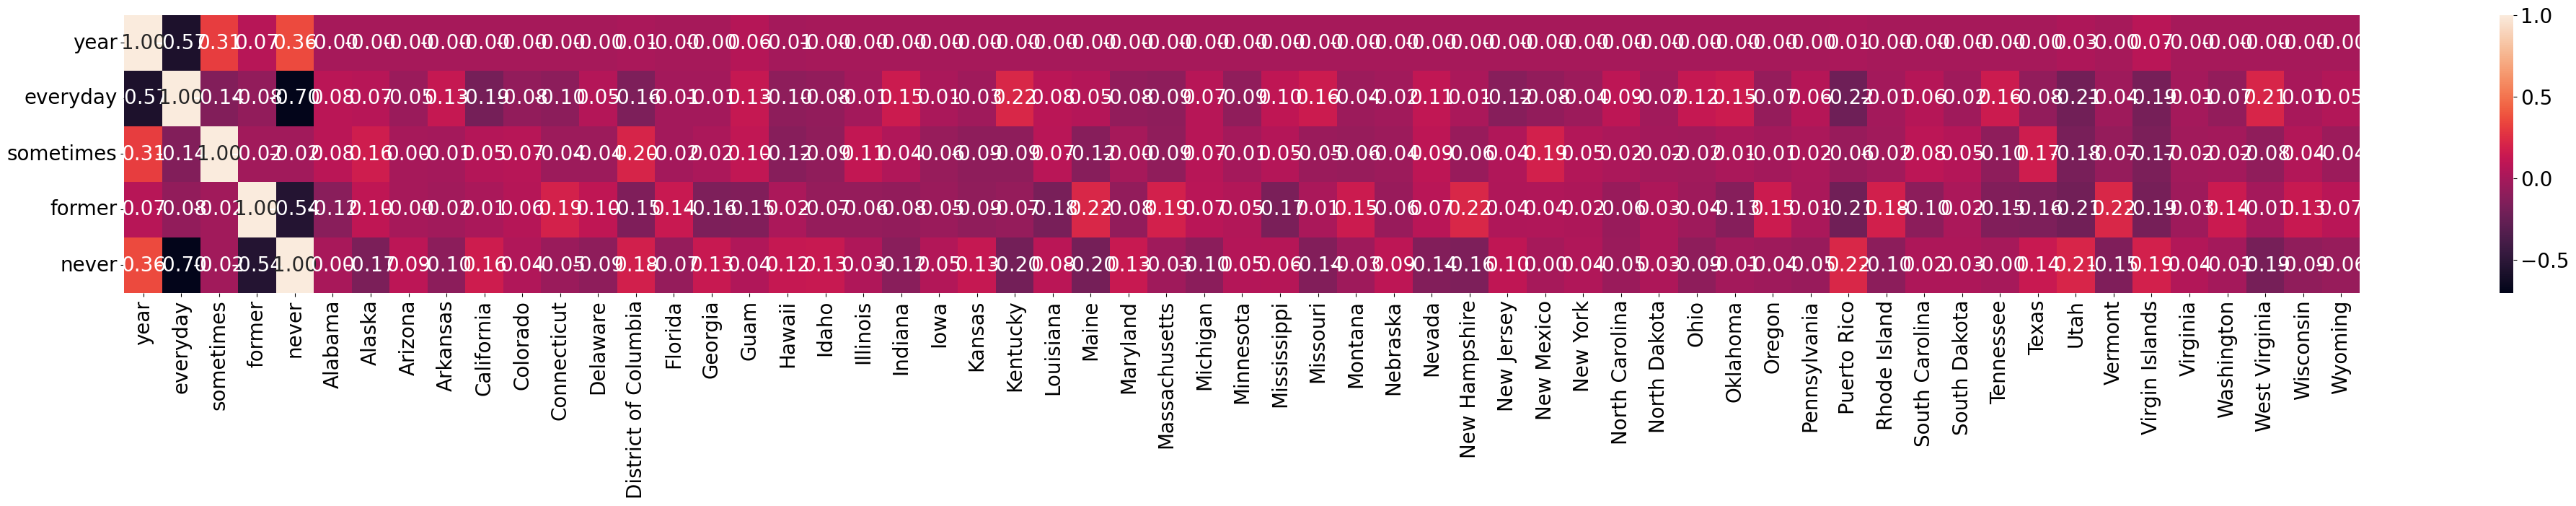

In [17]:
plt.figure(figsize=(50, 5))

sns.heatmap(corr_matrix[:5], annot=True, fmt=".2f")

plt.show()

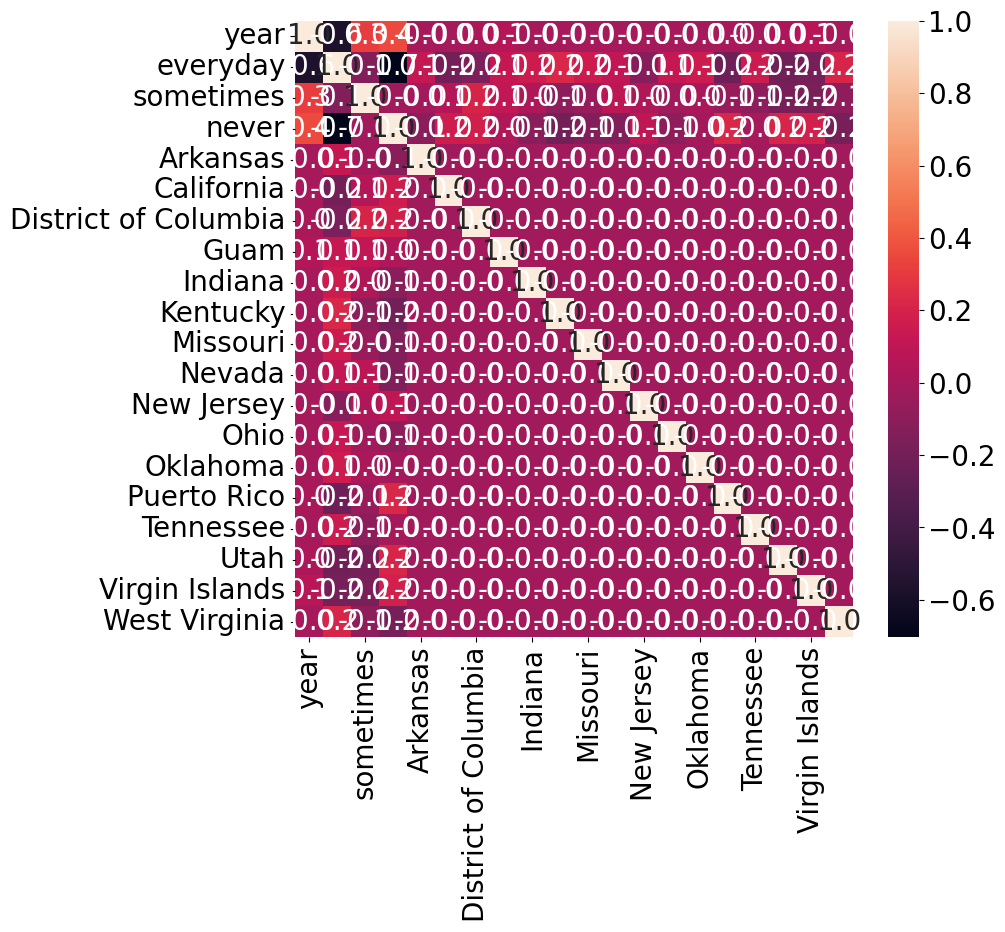

In [18]:
X_cols = [col for col in corr_matrix.columns if abs(corr_matrix[col]['everyday']) > 0.1] # хотя бы слабая корреляция с everyday
corr_matrix = df[X_cols].corr(method="spearman")


plt.figure(figsize=(9, 8))

sns.heatmap(corr_matrix[:], annot=True, fmt=".1f")

plt.show()


X_cols = corr_matrix['everyday'].sort_values(ascending=False, key=abs).keys()[1:]

In [19]:
# линейная модель со всеми факторами

y_col = 'everyday'
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[y_col],
                                                    test_size=0.2, random_state=999)

model = LinearRegression()
model.fit(X=X_train, y=y_train)
# print(f"Коэффициенты модели: {model.coef_}, свободный член: {model.intercept_}")

y_model = model.predict(X_train)
r2_train= metrics.r2_score(y_train, y_model)

y_pred = model.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)
print(f"R2_train = {round(r2_train, 3)}, R2_test = {round(r2_test, 3)}")

r2_adj_train, r2_adj_test = r2_adj(X_cols, y_train, y_model), r2_adj(X_cols, y_test, y_pred)
print(f"R2_adj_train = {round(r2_adj_train, 3)}, R2_adj_test = {round(r2_adj_test, 3)}")

print('Модель', ('не переобучена', 'переобучена')[int(r2_adj_train - r2_adj_test > 0.1)])

# вычислим метрики MAE и RMSE на тестовой выборке
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred) ** 0.5

print(f"MAE = {round(MAE, 3)}, RMSE = {round(RMSE, 3)}")
print('\n\nКоэффициенты при целевых признаках')
print(*list(zip(X_cols, model.coef_)), sep='\n')

# проверка теоремы Гаусса-Маркова
resid = y_train - y_model
exog = X_train.copy()
exog['const'] = np.ones(len(X_train))

alpha = 0.05
p_mist = stats.ttest_1samp(a=resid, popmean=0)[1]
p_homo = sm.stats.diagnostic.het_breuschpagan(resid, exog)[1]
dw = sm.stats.stattools.durbin_watson(resid)
p_jb = stats.jarque_bera(resid)[1]
print(f'''\n\n
1) Значения факторных признаков не случайны - выполняется.
2) Математическое ожидание ошибки модели равно 0: p={p_mist:.3f} - {('выполняется', 'не выполняется')[int(p_mist < alpha)]}.
3) Ошибки модели гомоскедастичны (их дисперсия постоянна): p={p_homo:.3f} - {('выполняется', 'не выполняется')[int(p_mist < alpha)]}.
4) Ошибки модели должны быть некоррелированы (независимы): DW={dw:.3f} - {('не выполняется', 'выполняется')[int(1.5 < dw < 2.5)]}.
5) Ошибки модели должны иметь нормальное распределение: p={p_jb:.3f} - {('выполняется', 'не выполняется')[int(p_mist < alpha)]}.
''')


R2_train = 0.877, R2_test = 0.825
R2_adj_train = 0.873, R2_adj_test = 0.803
Модель не переобучена
MAE = 0.012, RMSE = 0.015


Коэффициенты при целевых признаках
('never', np.float64(-0.2707197402864519))
('year', np.float64(-0.003740784688514095))
('Puerto Rico', np.float64(-0.03255215383989645))
('Kentucky', np.float64(0.0704661063145789))
('West Virginia', np.float64(0.050598210775419726))
('Utah', np.float64(-0.025031286489660853))
('California', np.float64(-0.03989911694503993))
('Virgin Islands', np.float64(-0.027298893947933497))
('District of Columbia', np.float64(-0.021427087569197725))
('Missouri', np.float64(0.036332257980665625))
('Tennessee', np.float64(0.04690316385105607))
('Indiana', np.float64(0.036430548411090925))
('Oklahoma', np.float64(0.03569427942980899))
('sometimes', np.float64(-0.03695986180711323))
('Arkansas', np.float64(0.030082817238667573))
('Guam', np.float64(0.08487906920859573))
('Ohio', np.float64(0.032940109627725526))
('New Jersey', np.float64(-0.019

С каждым годом доля курящих ежедневно уменьшается на 3.7%, а при увеличении количества никогда не куривших людей на 1% доля курящих ежедневно уменьшается на 0.27. Кроме того доля ежедневно курящих меняется в зависимости от штата.

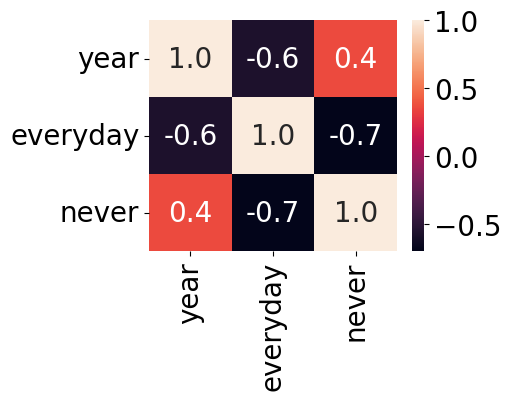

R2_train = 0.681, R2_test = 0.603
R2_adj_train = 0.68, R2_adj_test = 0.598
Модель не переобучена
MAE = 0.02, RMSE = 0.023


Коэффициенты при целевых признаках
('never', np.float64(-0.4582412216719007))
('year', np.float64(-0.003230009978219333))



1) Значения факторных признаков не случайны - выполняется.
2) Математическое ожидание ошибки модели равно 0: p=1.000 - выполняется.
3) Ошибки модели гомоскедастичны (их дисперсия постоянна): p=0.007 - выполняется.
4) Ошибки модели должны быть некоррелированы (независимы): DW=2.011 - выполняется.
5) Ошибки модели должны иметь нормальное распределение: p=0.000 - выполняется.



In [20]:
X_cols1 = [col for col in corr_matrix.columns if abs(corr_matrix[col]['everyday']) > 0.3] # умеренная корреляция с everyday
corr_matrix1 = df[X_cols1].corr(method="spearman")
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix1[:], annot=True, fmt=".1f")
# hmap = sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".1f")
plt.show()

X_cols1 = corr_matrix1['everyday'].sort_values(ascending=False, key=abs).keys()[1:]# линейная модель

y_col = 'everyday'
X_train1, X_test1, y_train, y_test = train_test_split(
  df[X_cols1], df[y_col], test_size=0.2, random_state=999
)

model1 = LinearRegression()
model1.fit(X=X_train1, y=y_train)
# print(f"Коэффициенты модели: {model.coef_}, свободный член: {model.intercept_}")

y_model1 = model1.predict(X_train1)
r2_train1= metrics.r2_score(y_train, y_model1)

y_pred1 = model1.predict(X_test1)
r2_test1 = metrics.r2_score(y_test, y_pred1)
print(f"R2_train = {round(r2_train1, 3)}, R2_test = {round(r2_test1, 3)}")

r2_adj_train1, r2_adj_test1 = r2_adj(X_cols1, y_train, y_model1), r2_adj(X_cols1, y_test, y_pred1)
print(f"R2_adj_train = {round(r2_adj_train1, 3)}, R2_adj_test = {round(r2_adj_test1, 3)}")

print('Модель', ('не переобучена', 'переобучена')[int(r2_adj_train1 - r2_adj_test1 > 0.1)])

# вычислим метрики MAE и RMSE на тестовой выборке
MAE1 = metrics.mean_absolute_error(y_test, y_pred1)
# в версии sklearn в Colab отсутствует готовая функция для RMSE
RMSE1 = metrics.mean_squared_error(y_test, y_pred1) ** 0.5

print(f"MAE = {round(MAE1, 3)}, RMSE = {round(RMSE1, 3)}")
print('\n\nКоэффициенты при целевых признаках')
print(*list(zip(X_cols1, model1.coef_)), sep='\n')

# проверка теоремы Гаусса-Маркова
import statsmodels.stats.api as sms
resid1= y_train - y_model1
exog1 = X_train1.copy()
exog1['const'] = np.ones(len(X_train1))

alpha = 0.05
p_mist1 = stats.ttest_1samp(a=resid1, popmean=0)[1]
p_homo1 = sm.stats.diagnostic.het_breuschpagan(resid1, exog1)[1]
dw1 = sm.stats.stattools.durbin_watson(resid1)
p_jb1 = stats.jarque_bera(resid1)[1]
print(f'''\n\n
1) Значения факторных признаков не случайны - выполняется.
2) Математическое ожидание ошибки модели равно 0: p={p_mist1:.3f} - {('выполняется', 'не выполняется')[int(p_mist1 < alpha)]}.
3) Ошибки модели гомоскедастичны (их дисперсия постоянна): p={p_homo1:.3f} - {('выполняется', 'не выполняется')[int(p_mist1 < alpha)]}.
4) Ошибки модели должны быть некоррелированы (независимы): DW={dw1:.3f} - {('не выполняется', 'выполняется')[int(1.5 < dw1 < 2.5)]}.
5) Ошибки модели должны иметь нормальное распределение: p={p_jb1:.3f} - {('выполняется', 'не выполняется')[int(p_mist1 < alpha)]}.
''')